In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import osmnx as ox

In [2]:
# Constants
CITY1 = 'Budapest, Hungary'
OTHER_CITIES_WITH_EPSG = {
    'Vienna, Austria': 'EPSG:23700',
    'Munich, Germany': 'EPSG:23032',
    'Berlin, Germany': 'EPSG:23033',
    'Rome, Italy': 'EPSG:23033',
    'Paris, France': 'EPSG:23031',
    'Madrid, Spain': 'EPSG:23030',
    'London, England': 'EPSG:23031',
    'New York, USA': 'EPSG:26718',
    'Chicago, USA': 'EPSG:26716',
    'Los Angeles, USA': 'EPSG:26911',
    'Buenos Aires, Argentina': 'EPSG:22196',
    'City of Johannesburg, South Africa': 'EPSG:22289',
    'Tehran, Iran': 'EPSG:32339',
    'Moscow, Russia': 'EPSG:23037',
    'Beijing, China': 'EPSG:32450',
    'Seoul, Korea': 'EPSG:32252'
}

In [3]:
CRS_BUDAPEST = 'EPSG:23700'  # Budapest EPSG

# Download and project Budapest
budapest = ox.geocode_to_gdf(CITY1).to_crs(CRS_BUDAPEST)
center_budapest = budapest.geometry.centroid.iloc[0]
area_budapest_km2 = budapest.area.iloc[0] / 1e6

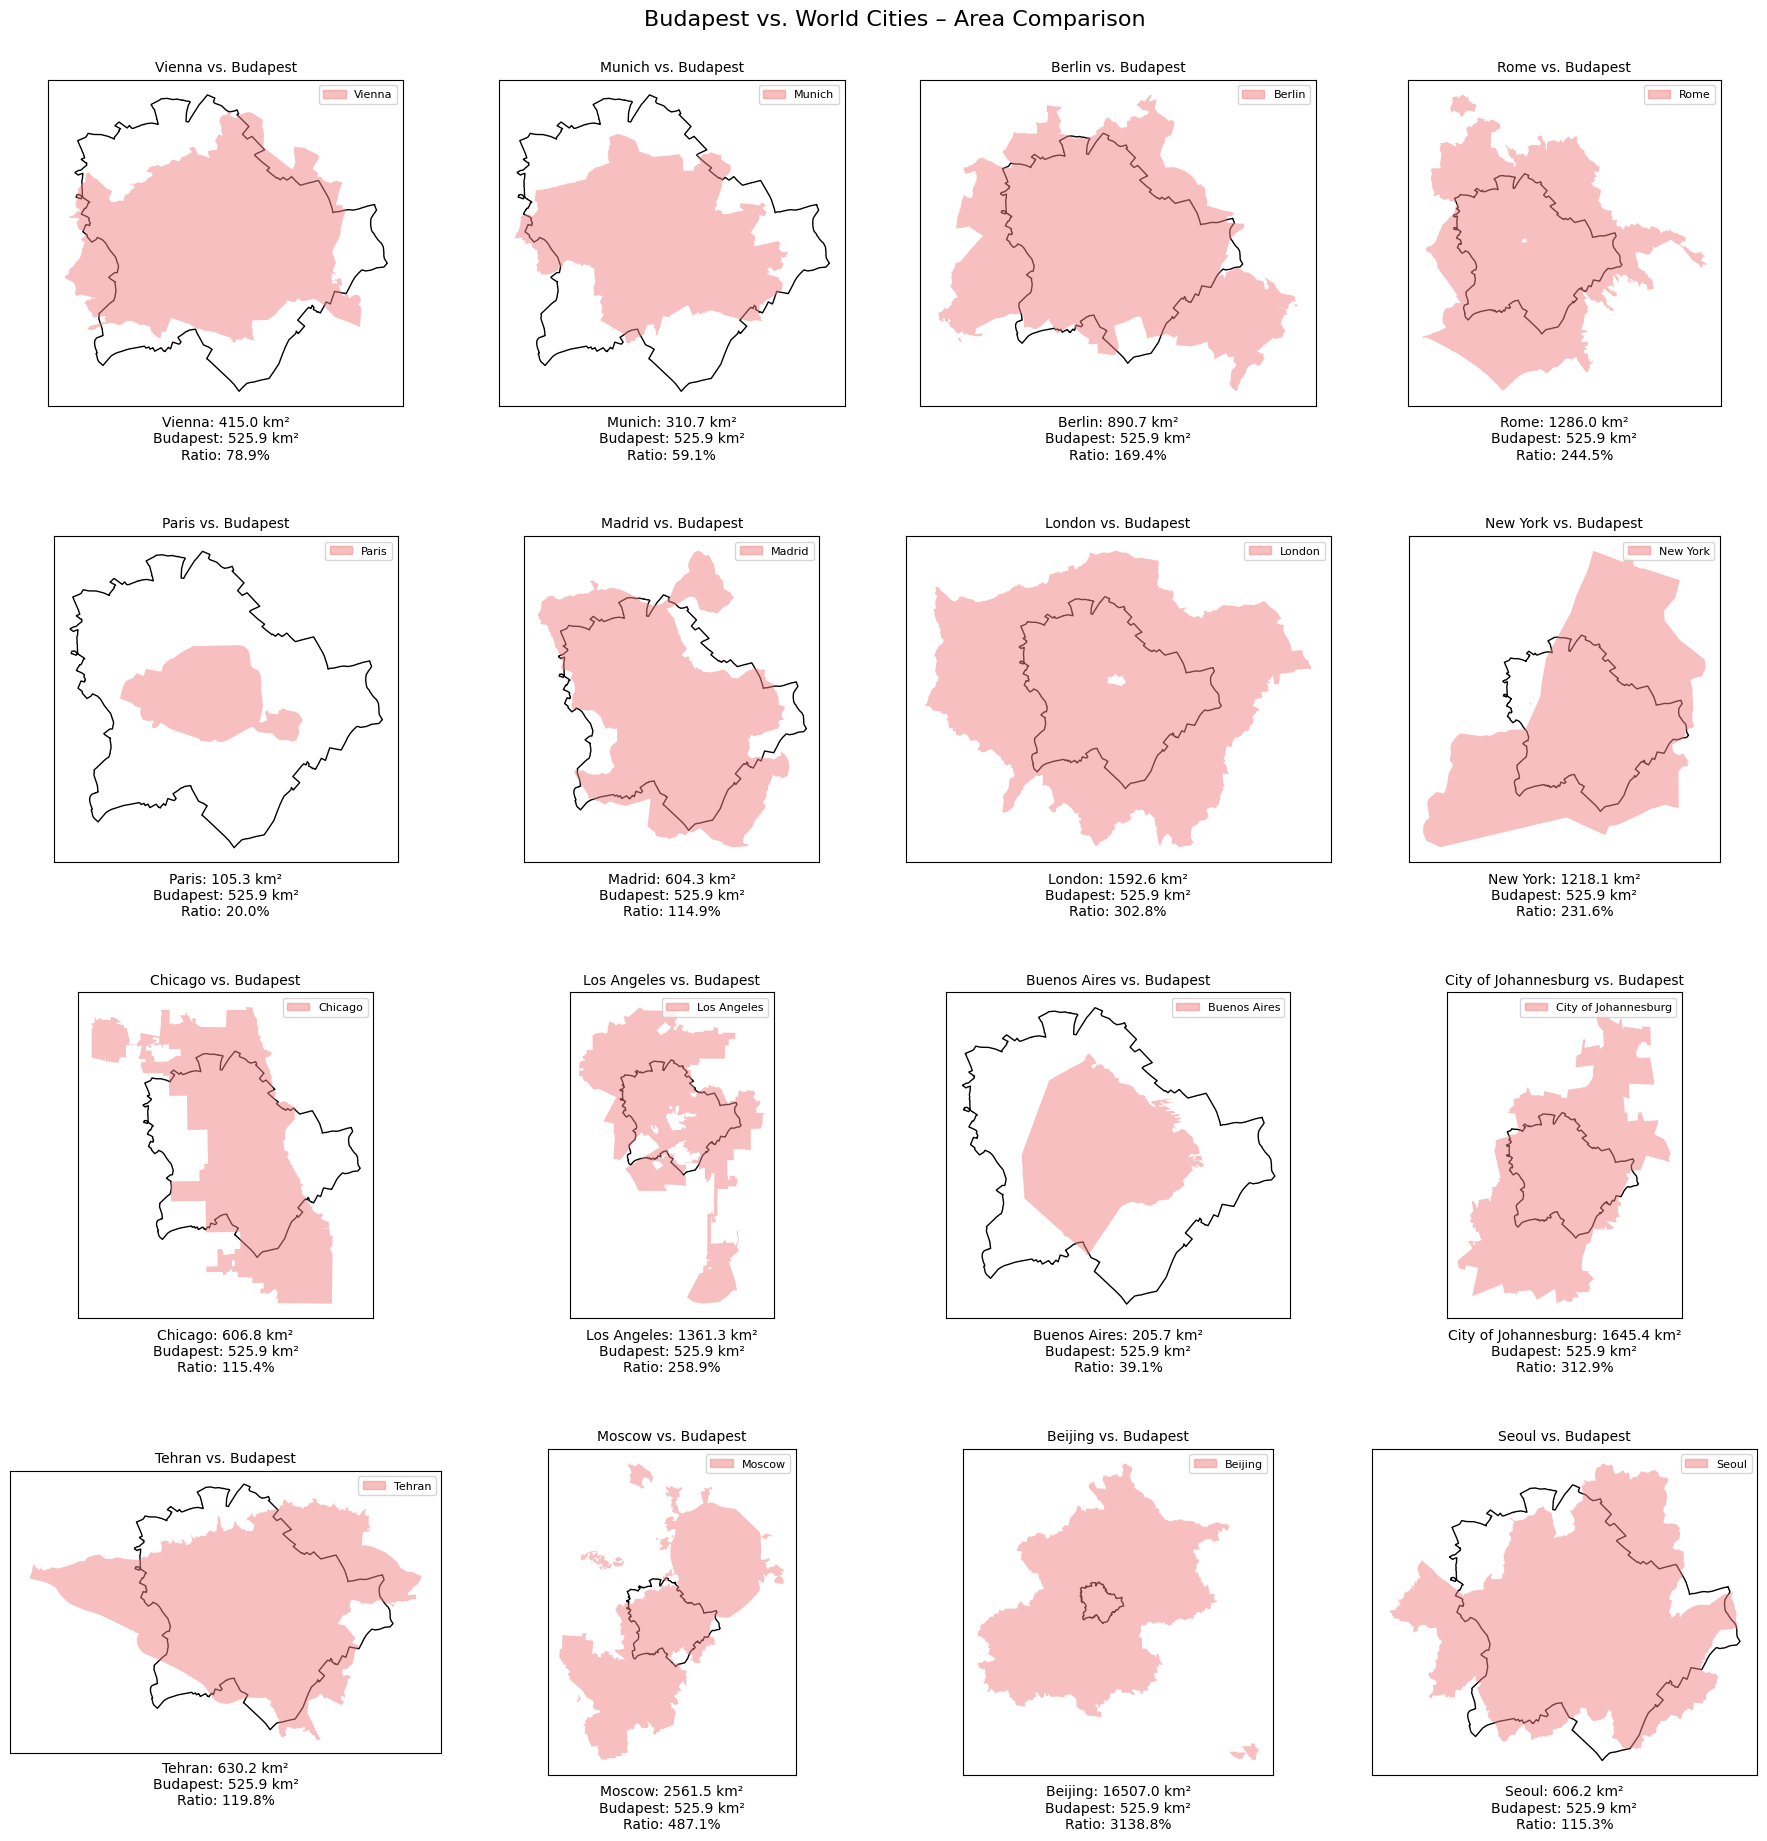

In [4]:
# Create subplot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()

# Loop through each city
for i, (city, crs) in enumerate(OTHER_CITIES_WITH_EPSG.items()):
    # Download and project current city
    gdf = ox.geocode_to_gdf(city).to_crs(crs)
    center = gdf.geometry.centroid.iloc[0]

    # Align to Budapest
    gdf_aligned = gdf.copy()
    gdf_aligned['geometry'] = gdf.geometry.translate(
        xoff=center_budapest.x - center.x,
        yoff=center_budapest.y - center.y
    )

    # Plot Budapest and the aligned city
    ax = axes[i]
    budapest.plot(ax=ax, color='white', edgecolor='black')
    gdf_aligned.plot(ax=ax, color='lightcoral', alpha=0.5)

    # Legend and title
    city_name = city.split(',')[0]
    green_patch = mpatches.Patch(color='lightcoral', alpha=0.5, label=city_name)
    ax.legend(handles=[green_patch], loc='upper right', fontsize=8)
    ax.set_title(f"{city_name} vs. Budapest", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

    # Area ratio
    area_km2 = gdf.area.iloc[0] / 1e6
    ratio = area_km2 / area_budapest_km2
    ax.text(0.5, -0.03, f"{city_name}: {area_km2:.1f} km²\n"
                        f"Budapest: {area_budapest_km2:.1f} km²\n"
                        f"Ratio: {ratio:.1%}",
            transform=ax.transAxes,
            ha='center', va='top', fontsize=10)

# Hide any unused axes (in case list length < subplot count)
for j in range(len(OTHER_CITIES_WITH_EPSG), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Budapest vs. World Cities – Area Comparison", fontsize=16, y=1.02)
plt.savefig('Budapest_vs_World_Cities.png', dpi=300, bbox_inches='tight')
plt.show()